In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 13760 (delta 9), reused 5 (delta 1), pack-reused 13738
Receiving objects: 100% (13760/13760), 12.35 MiB | 19.88 MiB/s, done.
Resolving deltas: 100% (9385/9385), done.


In [2]:
#change makefile to have opencv and GPU enabled
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-25 07:40:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   587KB/s    in 9m 10s  

2020-06-25 07:49:55 (441 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [17]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

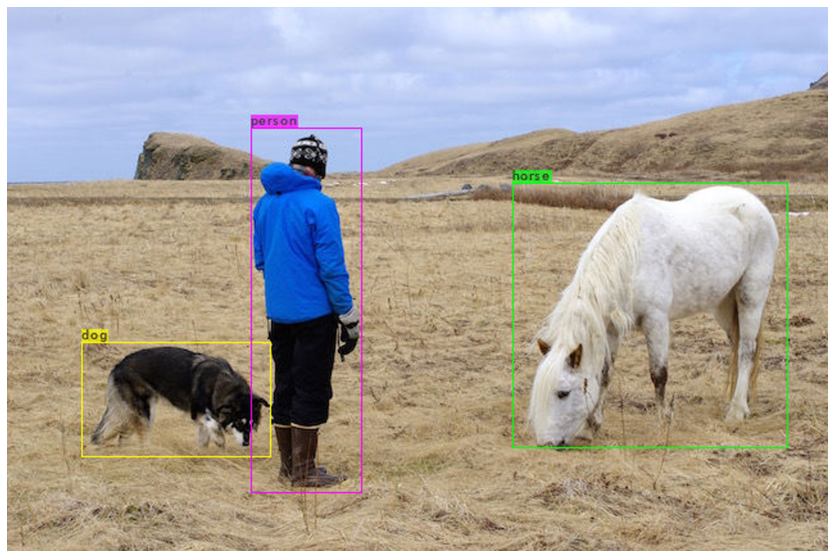

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [4]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

'Adagrad Hiring Challenge.pdf'
 ALGORITHM
 Analytics
'andrew ng ML'
"Anshul kumar's projects"
'Application_Form_180607002 (1).PDF'
 Application_Form_180607002.PDF
'articles for ml projects'
 ATEva_1.gdoc
'BCA  - 2018 BATCH  SUM. TRG. FORM .docx'
 Cancer_Detection_Prateek_Upadhyay.pdf
 Classroom
'Colab Notebooks'
'Daily DS bits'
'Deep Learning Specialization'
'Family + friends school'
 fellowship_poster.pdf
'Getting started.pdf'
'hyderabad admit card.pdf'
 ITPC
 jeca_admit_card.pdf
 Krypthon
'ML + Python'
'MultiLingual Toxic Comment with BERT.ipynb'
'My Galary'
 Networking
 obj.data
 PROJECTS
'Pune MCA 2007.pdf'
 pythondatasciencehandbook.pdf
'python for data science pdfs nptel'
 Resume_Prateek_Upadhyay2.pdf
 Resume_Prateek_Upadhyay.docx
 Resume_Prateek_Upadhyay.pdf
 VehiclePlate


In [5]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/VehiclePlate

backup	     generate_train.py	obj.names  yolov3_custom.cfg
darknet.zip  obj.data		obj.zip


In [7]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/VehiclePlate/obj.zip ../

In [8]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/dataset/4c9229356d8474f8.jpg  
  inflating: data/dataset/4c9229356d8474f8.txt  
  inflating: data/dataset/4cad4d510b1221b3.txt  
  inflating: data/dataset/4cd3f45c97142595.txt  
  inflating: data/dataset/4cfccb006b4aec5b.txt  
  inflating: data/dataset/4d0223621f2b3b56.jpg  
  inflating: data/dataset/4da99afca5a173cc.jpg  
  inflating: data/dataset/4debd5bfa06748c5.jpg  
  inflating: data/dataset/4dece8ad364af604.txt  
  inflating: data/dataset/4e7b769e98d3bfa7.jpg  
  inflating: data/dataset/4e7b769e98d3bfa7.txt  
  inflating: data/dataset/4e9ba507a7b78c36.jpg  
  inflating: data/dataset/4ea4422f9d529ae8.jpg  
  inflating: data/dataset/4f0b85d3471c358a.jpg  
  inflating: data/dataset/4f0b85d3471c358a.txt  
  inflating: data/dataset/4f12b65c28f86454.txt  
  inflating: data/dataset/4f506b123474513d.jpg  
  inflating: data/dataset/4fcc5169e77ff629.jpg  
  inflating: data/dataset/4fcc5169e77ff629.txt  
  inflating: data/

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/VehiclePlate/yolov3_custom.cfg

In [9]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/VehiclePlate/yolov3_custom.cfg ./cfg

In [10]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/VehiclePlate/obj.names ./data
!cp /mydrive/VehiclePlate/obj.data  ./data

In [11]:
!cp /mydrive/VehiclePlate/generate_train.py ./

In [13]:
!python generate_train.py

In [14]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-06-25 09:08:54--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   361KB/s    in 7m 50s  

2020-06-25 09:16:46 (338 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!rm /content/darknet/backup -r
!ln -s /content/drive/'My Drive'/VehiclePlate/backup /content/darknet

In [ ]:
%cd /content/darknet
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

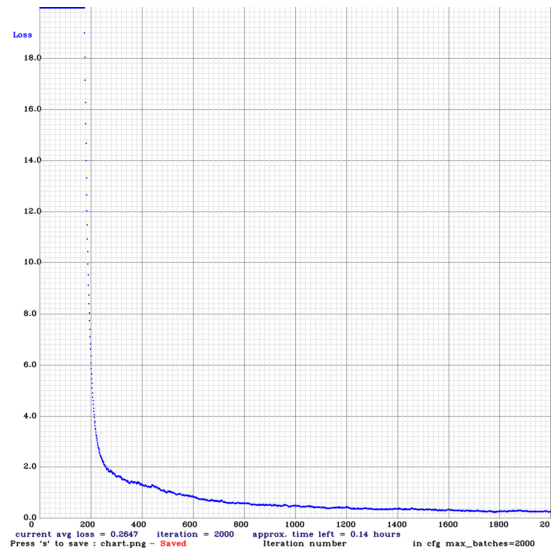

In [ ]:
imShow('chart.png')

In [15]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [28]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/VehiclePlate/backup/yolov3_custom_last.weights /mydrive/VehiclePlate/images/traffic.mp4 -out_filename results.avi


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0

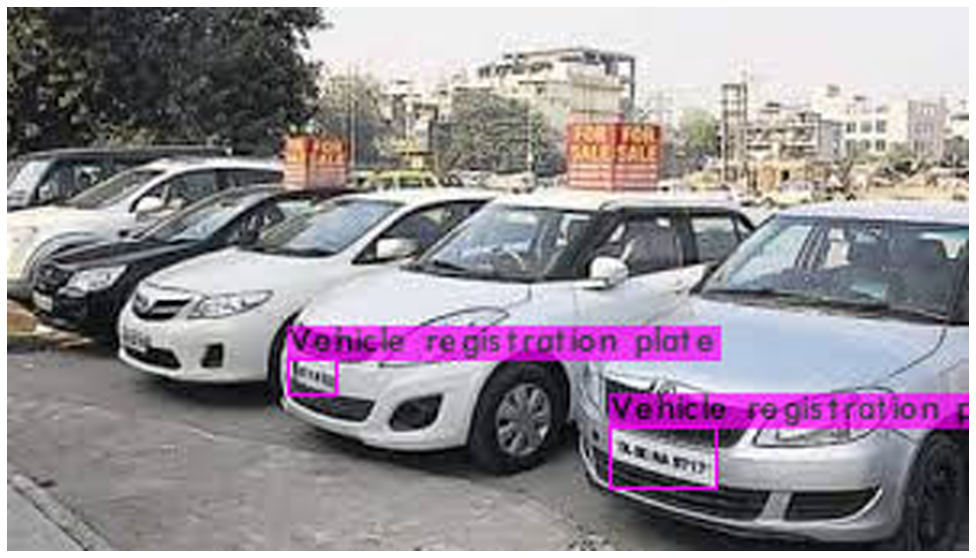

In [27]:
imShow('predictions.jpg')

In [29]:
from google.colab import files
uploaded = files.upload()

Saving traffic.mp4 to traffic.mp4


In [30]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/VehiclePlate/backup/yolov3_custom_last.weights -dont_show traffic.mp4 -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.
Objects:

Vehicle registration plate: 52% 
Vehicle registration plate: 48% 

FPS:13.8 	 AVG_FPS:13.6

 cvWriteFrame 
Objects:

Vehicle registration plate: 46% 
Vehicle registration plate: 35% 
Vehicle registration plate: 28% 
Vehicle registration plate: 28% 

FPS:13.8 	 AVG_FPS:13.6

 cvWriteFrame 
Objects:

Vehicle registration plate: 45% 
Vehicle registration plate: 39% 
Vehicle registration plate: 38% 
Vehicle registration plate: 26% 

FPS:13.8 	 AVG_FPS:13.6

 cvWriteFrame 
Objects:

Vehicle registration plate: 42% 
Vehicle registration plate: 32% 
Vehicle registration plate: 27% 

FPS:13.8 	 AVG_FPS:13.6

 cvWriteFrame 
Objects:

Vehicle registration plate: 39% 
Vehicle registration plate: 38% 
Vehicle registration plate: 27% 
Vehicle registration plate: 26% 

FPS:13.9 	 AVG_FPS:13.6

 cvWriteFrame 
Objects:

Vehicle registration plate: 55% 
Vehicle registration plate: 43% 
Vehicle registration plate: 32% 

FPS:13.8 	 AVG_FPS:13.6

In [31]:
!git init

Reinitialized existing Git repository in /content/darknet/.git/


In [42]:
%cd /content/darknet

/content/darknet


In [43]:
!git init

Reinitialized existing Git repository in /content/darknet/.git/


In [44]:
!git config — global user.email “prateekupadhyay1997@gmail.com”
!git config — global user.name “prateekupadhyay1997”

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

In [45]:
!git add -A

In [46]:
!git commit -m “first commit”

error: pathspec 'commit”' did not match any file(s) known to git.


In [47]:
!git remote add origin https://<prateekupadhyay1997>:<Hritikmanish@146>github@github.com/prateekupadhyay1997/Vehicle-Registration-Plate-Recognition.git

/bin/bash: prateekupadhyay1997: No such file or directory
